# **Algoritmos Genéricos**



<p style="font-size: smaller; text-align: right;">João Dias & Rafael Rodrigues</p>



## **Objetivo**

Aplicar um Algoritmo Genético (AG) para encontrar o valor máximo da função 
𝑓(𝑥)=𝑥2−3𝑥+4 no intervalo 𝑋=[−10,+10].



## **Estrutura do Notebook**

1. **Introdução**
  
   Explicação sobre os algoritmos genéticos e sua aplicação na otimização de funções.

2. **Representação e População Inicial**

   Codificação dos indivíduos e geração da população inicial.

3. **Função Objetivo**

   Implementação da função 𝑓(𝑥).


4. **Operadores Genéticos**

   Implementação das operações de seleção, crossover e mutação.

5. **Execução do Algoritmo**

   Evolução ao longo de várias gerações e visualização dos resultados.

6. **Conclusão**

   Análise dos resultados e avaliação da eficácia do algoritmo.



## **Introdução**

Os Algoritmos Genéticos (AGs) são meta-heurísticas inspiradas na seleção natural e evolução biológica. Eles utilizam uma população de soluções candidatas que evoluem ao longo de gerações por meio de:

- **Seleção:** Escolha dos melhores indivíduos com base em sua aptidão.
- **Crossover:** Combinação de características entre indivíduos selecionados.
- **Mutação:** Introdução de pequenas variações para manter a diversidade.

Neste notebook, aplicaremos um AG para encontrar a solução que maximiza a função 𝑓(𝑥)no intervalo definido, utilizando:
- População inicial de *4 indivíduos*.
- Taxas de *crossover (70%)* e *mutação (1%)*.
- *Seleção por torneio* como método de escolha.
- Avaliação ao longo de *5 gerações*, podendo ser estendido para *20 gerações*.




---

## **Representação dos indivíduos e População inicial**

Para implementar o Algoritmo Genético (AG), precisamos codificar os valores de 𝑥 como vetores binários. Vamos dividir essa etapa em três partes:

1. *Codificação dos Indivíduos:* Representação de valores de 𝑥 em formato binário.
2. *Decodificação:* Conversão do vetor binário de volta para valores reais no intervalo [−10,10].
3. *Geração da População Inicial:* Criação de uma população inicial de 4 indivíduos.




---

## **1. Configuração Inicial e Funções de Codificação**

In [71]:
import numpy as np
import random
import matplotlib.pyplot as plt

def decodificar_individuo(individuo):
        """Converte vetor binário para valor decimal no intervalo [-10, 10]"""
        binario = ''.join(map(str, individuo))
        # Mapeia o binário para o intervalo [-10, 10]
        valor = int(binario, 2)
        # Normaliza para o intervalo [-10, 10]
        valor_mapeado = -10 + (valor / (2**len(individuo) - 1)) * 20
        return valor_mapeado

def funcao_objetivo(x):
        """Função f(x) = x² - 3x + 4"""
        return x**2 - 3*x + 4

def gerar_populacao_inicial(numero_individuos, tamanho_cromossomo):
        """Gera população inicial de indivíduos"""
        return [codificar_individuo(random.uniform(-10, 10)) 
        for _ in range(numero_individuos)]

def codificar_individuo(valor):
        """Converte valor decimal para vetor binário"""
        # Mapeia o valor do intervalo [-10, 10] para [0, 2^n-1]
        valor_normalizado = int(((valor + 10) / 20) * (2**10 - 1))
        # Converte para binário com 10 bits
        binario = bin(valor_normalizado)[2:].zfill(10)
        return [int(bit) for bit in binario]

---

## **2. Função de Fitness**

A função fitness mede o quão “bom” é um indivíduo em resolver o problema. Para este trabalho, o valor de f(x) será a medida de fitness.

In [72]:
def funcao_fitness(x):
        """
        Função de aptidão para maximização
        Transforma o valor da função objetivo em um valor de aptidão positivo
        """
        # Calcula o valor da função objetivo
        valor_objetivo = funcao_objetivo(x)
        # Método de transformação linear
        # Garante que todos os valores sejam positivos
        # Preserva a proporção entre os valores
        fitness = valor_objetivo + abs(min(funcao_objetivo(x) for x in np.linspace(-10, 10, 100))) + 1
        return fitness

---

## **3. Seleção por Torneio**

In [73]:
def selecao_torneio(populacao, funcao_aptidao, tamanho_torneio=3):
        """Seleção por torneio"""
        torneio = random.sample(populacao, tamanho_torneio)
        return max(torneio, key=funcao_aptidao)  # Máximo pois queremos maximizar

---

## **4. Crossover (Recombinação)**

In [74]:
def crossover(pai1, pai2, taxa_crossover):
    """Realiza crossover com taxa definida"""
    if random.random() < taxa_crossover:
        ponto_corte = random.randint(1, len(pai1)-1)
        filho1 = pai1[:ponto_corte] + pai2[ponto_corte:]
        filho2 = pai2[:ponto_corte] + pai1[ponto_corte:]
        return filho1, filho2
    return pai1, pai2

---

## **5. Mutação**

In [75]:
def mutacao(individuo, taxa_mutacao):
    """Realiza mutação com taxa definida"""
    for i in range(len(individuo)):
        if random.random() < taxa_mutacao:
            individuo[i] = 1 - individuo[i]
    return individuo

---

## **6. Execução do Algoritmo**

Geração 0: Melhor x = -7.0088, Melhor valor = 74.1496
Geração 1: Melhor x = -7.0088, Melhor valor = 74.1496
Geração 2: Melhor x = -7.0088, Melhor valor = 74.1496
Geração 3: Melhor x = -7.0088, Melhor valor = 74.1496
Geração 4: Melhor x = -7.0088, Melhor valor = 74.1496

--- Resultado Final ---
Melhor x encontrado: -7.0088
Valor máximo de f(x): 74.1496
Representação Binária: [0, 0, 1, 0, 0, 1, 1, 0, 0, 1]


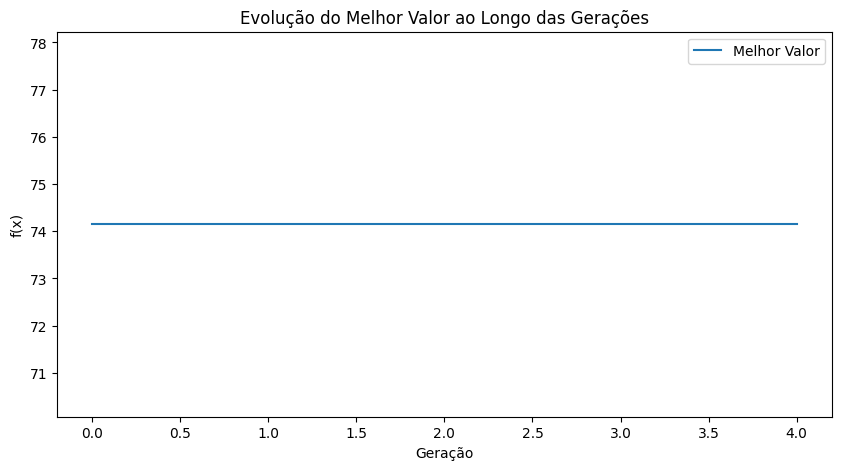

In [76]:
def algoritmo_genetico(
    numero_individuos=4,     # População inicial 
    numero_geracoes=5,       # Número de gerações
    taxa_crossover=0.7,      # Taxa de crossover 
    taxa_mutacao=0.01,       # Taxa de mutação
    tamanho_cromossomo=10    # Tamanho do cromossomo em bits
):
    """Executa o Algoritmo Genético para maximizar f(x)"""
    # População inicial
    populacao = gerar_populacao_inicial(numero_individuos, tamanho_cromossomo)
    
    # Histórico de evolução
    historico_evolucao = []
    
    for geracao in range(numero_geracoes):
        # Avalia a aptidão de cada indivíduo
        aptidoes = []
        valores_x = []
        
        for individuo in populacao:
            x = decodificar_individuo(individuo)
            valores_x.append(x)
            aptidoes.append(funcao_objetivo(x))
        
        # Encontra o melhor indivíduo
        melhor_indice = np.argmax(aptidoes)
        melhor_x = valores_x[melhor_indice]
        melhor_valor = aptidoes[melhor_indice]
        
        # Registra detalhes da geração
        historico_evolucao.append({
            'geracao': geracao,
            'melhor_x': melhor_x,
            'melhor_valor': melhor_valor,
            'media_aptidao': np.mean(aptidoes)
        })
        
        # Impressão de progresso
        print(f"Geração {geracao}: Melhor x = {melhor_x:.4f}, Melhor valor = {melhor_valor:.4f}")
        
        # Seleção, crossover e mutação
        nova_populacao = []
        
        while len(nova_populacao) < numero_individuos:
            # Seleção de pais
            pai1 = selecao_torneio(populacao, lambda ind: funcao_objetivo(decodificar_individuo(ind)))
            pai2 = selecao_torneio(populacao, lambda ind: funcao_objetivo(decodificar_individuo(ind)))
            
            # Crossover
            filho1, filho2 = crossover(pai1, pai2, taxa_crossover)
            
            # Mutação
            filho1 = mutacao(filho1, taxa_mutacao)
            filho2 = mutacao(filho2, taxa_mutacao)
            
            nova_populacao.extend([filho1, filho2])
        
        # Atualiza população
        populacao = nova_populacao[:numero_individuos]
    
    # Resultado final
    aptidoes_finais = [funcao_objetivo(decodificar_individuo(ind)) for ind in populacao]
    melhor_indice = np.argmax(aptidoes_finais)
    melhor_solucao = populacao[melhor_indice]
    melhor_x = decodificar_individuo(melhor_solucao)
    
    # Impressão detalhada do resultado
    print("\n--- Resultado Final ---")
    print(f"Melhor x encontrado: {melhor_x:.4f}")
    print(f"Valor máximo de f(x): {funcao_objetivo(melhor_x):.4f}")
    print(f"Representação Binária: {melhor_solucao}")
    
    # Gráfico da evolução
    plt.figure(figsize=(10, 5))
    plt.plot([g['geracao'] for g in historico_evolucao], 
            [g['melhor_valor'] for g in historico_evolucao], 
            label='Melhor Valor')
    plt.title('Evolução do Melhor Valor ao Longo das Gerações')
    plt.xlabel('Geração')
    plt.ylabel('f(x)')
    plt.legend()
    plt.show()
    
    return {
        'melhor_x': melhor_x,
        'melhor_valor': funcao_objetivo(melhor_x),
        'historico_evolucao': historico_evolucao
    }

# Execução do algoritmo
resultado = algoritmo_genetico(
    numero_individuos=4,     # Podem ser aumentados até 30
    numero_geracoes=5,       # Podem ser aumentados até 20
    taxa_crossover=0.7,      # 70%
    taxa_mutacao=0.01        # 1%
)

---